<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml11_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Projection vs Manifold

In [3]:
from sklearn.datasets import make_swiss_roll

In [4]:
X, y = make_swiss_roll(n_samples=1_000, noise=0.2, random_state=42)
X.shape, y.shape

((1000, 3), (1000,))

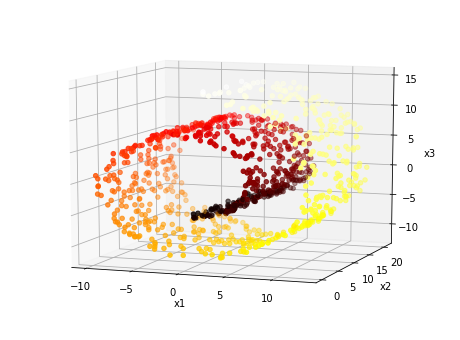

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(elev=10, azim=-70)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

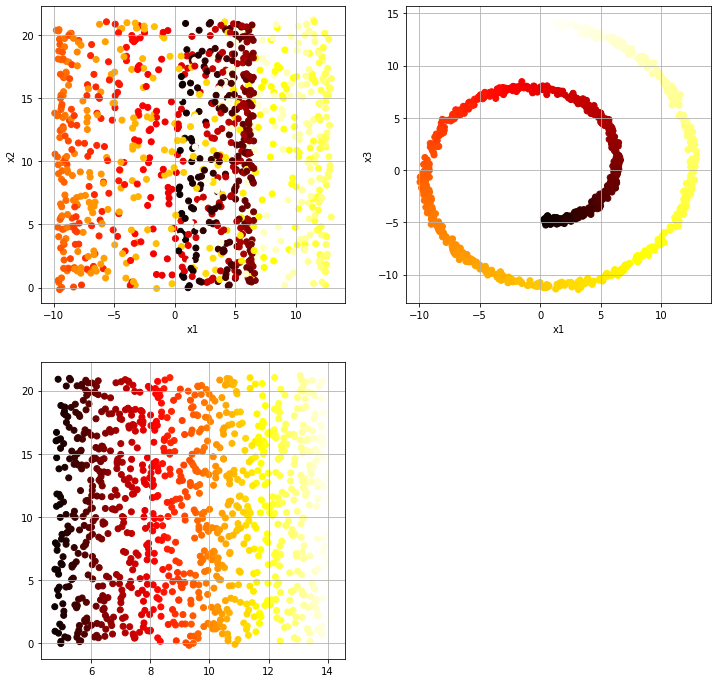

In [6]:
plt.figure(figsize=(12, 12))

# x1-x2 projection
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.hot)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

# x1-x3 projection
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.hot)
plt.xlabel('x1')
plt.ylabel('x3')
plt.grid()

# manifold
plt.subplot(223)
plt.scatter(y, X[:, 1], c=y, cmap=plt.cm.hot)
plt.grid()

plt.show()

# PCA(Principal Component Analysis: 주성분 분석)

* 훈련 셋에서 분산의 가장 많은 부분을 설명하는 축(axis)을 찾는다. => 첫번째 주성분(principal component)
* 첫번째 주성분 축에 수직(orthogonal)이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾는다. => 두번째 주성분
* 이전의 두 축에 수직이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾는다.
* 위 과정들을 특성 수(차원 수)만큼 반복...


MNIST 데이터를 사용한 주성분 분석

In [7]:
from sklearn.datasets import fetch_openml

In [8]:
mnist = fetch_openml(name='mnist_784')

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [10]:
X = mnist['data']
y = mnist['target'].astype(np.int16)
X.shape, y.shape
#> sample 수: 70,000, 특성 수(=차원 수): 784

((70000, 784), (70000,))

In [11]:
# 훈련 셋/테스트 셋 분리
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, y_train.shape

((56000, 784), (56000,))

In [13]:
# 주성분 분석에 필요한 클래스
from sklearn.decomposition import PCA

In [14]:
# 데이터 셋에서 선택할 주성분의 개수를 지정하는 방법:
pca = PCA(n_components=5, random_state=42)

In [16]:
# 주성분 축을 찾음 - fit
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
# 784차원 데이터를 5차원 데이터로 축소 -> 주성분 축으로 이루어진 평면에 투영(projection)
X_train_reduced = pca.transform(X_train)
X_train_reduced.shape

(56000, 5)

In [19]:
# 5차원으로 축소된 데이터를 원래 차원인 784차원 데이터로 복원
# 차원이 축소될 때 데이터 손실이 있었기 때문에, 원래 데이터와 똑같이 복원되지는 않음.
# -> 재구성 오차
X_train_recovered = pca.inverse_transform(X_train_reduced)
X_train_recovered.shape

(56000, 784)

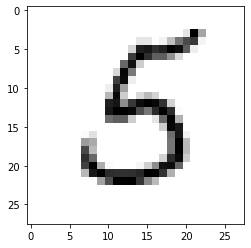

In [21]:
plt.imshow(X_train[0].reshape((28, 28)), cmap=plt.cm.binary)  # 원본 데이터

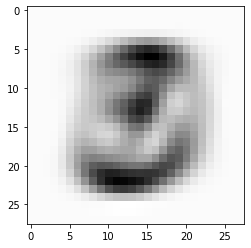

In [22]:
plt.imshow(X_train_recovered[0].reshape((28, 28)), cmap=plt.cm.binary)

In [23]:
# explained variance(설명된 분산): 주성분 축을 따라서 계산된 분산들의 리스트
pca.explained_variance_

array([335074.78686038, 245685.70643709, 211888.14529997, 185234.62598263,
       168215.14040871])

In [24]:
# explained variance ratio(설명된 분산 비율): 주성분 축을 따라서 계산된 분산들의 비율.
pca.explained_variance_ratio_

array([0.09758723, 0.07155354, 0.06171034, 0.05394776, 0.048991  ])

In [25]:
# cumulative sume
np.cumsum(pca.explained_variance_ratio_)

array([0.09758723, 0.16914077, 0.23085111, 0.28479887, 0.33378987])

In [27]:
# 주성분 축의 개수를 지정하지 않고, 모든 주성분 축을 찾음.
# 원래 데이터의 차원 수와 같은 개수의 주성분 축을 찾음.
pca = PCA(random_state=42)  # n_components=None
pca.fit(X_train)
evr = pca.explained_variance_ratio_  # explained variance ratio
evr.shape

(784,)

In [34]:
evr_cumsum = np.cumsum(evr)
# print(evr_cumsum)
# print(evr_cumsum >= 0.5)
# 전체 훈련 셋의 분산의 95% 이상을 설명할 수 있느 주성분의 개수
n_pc = np.argmax(evr_cumsum >= 0.95) + 1
print(n_pc)

154


In [36]:
pca = PCA(n_components=n_pc, random_state=42)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_train_reduced.shape  # 784차원 -> 154차원 축소

(56000, 154)

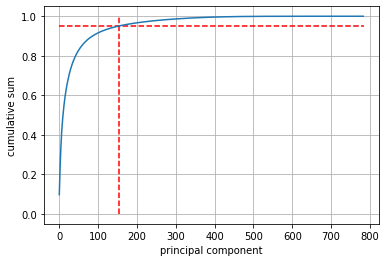

In [40]:
# 설명된 분산 비율(explained variance ratio) 누적 합계 그래프
plt.plot(evr_cumsum)
plt.vlines(x=n_pc, ymin=0, ymax=1, colors='red', linestyles='dashed')
plt.hlines(y=0.95, xmin=0, xmax=784, colors='red', linestyles='dashed')

plt.xlabel('principal component')
plt.ylabel('cumulative sum')
plt.grid()

In [41]:
# PCA를 생성할 때 n_components를 설명된 분산 비율(0 <= ratio <= 1)로 설정할 수도 있음.
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_train_reduced.shape

(56000, 154)

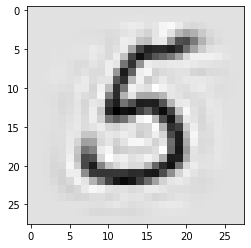

In [43]:
# 원본 훈련 셋(X_train)과 차원 축소 후 복원된 훈련 셋(X_train_recovered) 비교
X_train_recovered = pca.inverse_transform(X_train_reduced)
# X_train_recovered.shape
plt.imshow(X_train_recovered[0].reshape((28, 28)), cmap=plt.cm.binary)

* 훈련 셋(X_train, y_train)을 LogisticRegression 알고리즘으로 훈련 - 훈련 시간 측정
* 테스트 셋(X_test, y_test)에서 예측/정확도를 평가.
* 훈련 셋을 95% 분산을 설명하는 주성분 축을 찾아서 차원 축소 - X_train_reduced
* 차원이 축소된 훈련 셋(X_train_reduced, y_train)을 LogisticRegression으로 훈련 - 훈련 시간 측정
* 테스트 셋을 차원 축소 후(X_test_reduced, y_test), 예측/정확도를 평가

# Kernel PCA

* Kernel PCA의 종류: linear, rbf, sigmoid
* Kernel PCA에서 GridSearchCV를 사용해서 하이퍼 파라미터를 튜닝하는 방법

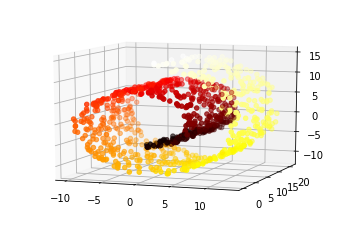

In [47]:
X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(elev=10, azim=-70)
plt.show()

In [48]:
from sklearn.decomposition import KernelPCA

In [49]:
# linear 커널을 사용한 KPCA
lin_kpca = KernelPCA(n_components=2, kernel='linear', random_state=42)
X_reduced = lin_kpca.fit_transform(X)
X_reduced.shape  # 3차원 데이터 -> 2차원 데이터 축소

(1000, 2)

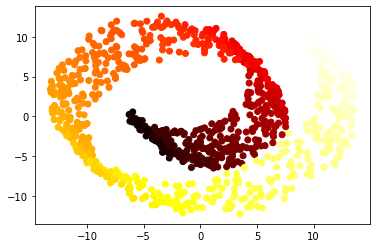

In [50]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

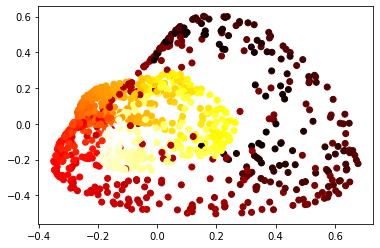

In [52]:
# Gaussian RBF 커널을 사용한 KPCA
rbf_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03,
                     random_state=42)
X_reduced = rbf_kpca.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

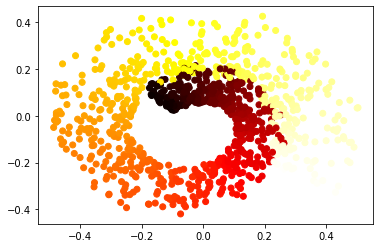

In [55]:
# sigmoid 커널을 사용한 KPCA
sigmoid_kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.003,
                         random_state=42)
X_reduced = sigmoid_kpca.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [60]:
# swiss_roll 가상 데이터의 y 값은 연속적인 값 -> 분류 문제로 변환
X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

print(y[:5])
y = (y > 7.0).astype(np.int16)
y[:5]

[ 8.24234644 13.67266022 11.61126935 10.35461227  6.18283002]


array([1, 1, 1, 1, 0], dtype=int16)

In [61]:
# 훈련 셋: KPCA 차원 축소 -> 분류 알고리즘 훈련
# 테스트 셋: KPCA 차원 축소 -> 분류 알고리즘 예측/평가
model = Pipeline([
                  ('kpca', KernelPCA(n_components=2, random_state=42)),
                  ('clf', LogisticRegression(random_state=42))
])

In [66]:
# GridSearchCV에서 튜닝할 하이퍼 파라미터 지정 - kpca의 kernel과 gamma
param_grid = [{
    'kpca__kernel': ['rbf', 'sigmoid'],
    'kpca__gamma': np.linspace(0.03, 0.05, 10)
}]  # 2 * 10 = 20 교차 검증(Cross Validation)

In [63]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1)

In [68]:
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None, random_state=42,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                       

In [69]:
grid_search.best_params_

{'kpca__gamma': 0.04555555555555556, 'kpca__kernel': 'rbf'}

In [71]:
best_model = grid_search.best_estimator_

In [72]:
from sklearn.metrics import accuracy_score

In [74]:
train_acc = accuracy_score(y, best_model.predict(X))
train_acc

0.946

# LLE(Locally Linear Embedding)

* Manifold 학습 방법
* 각 훈련 샘플들이 가장 가까운 이웃들에 얼마나 선형적으로 연관되어 있는 지를 측정한 값을 이용해서 차원을 축소.

In [75]:
X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [76]:
from sklearn.manifold import LocallyLinearEmbedding

In [82]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42)
X_reduced = lle.fit_transform(X)
X_reduced.shape

(1000, 2)

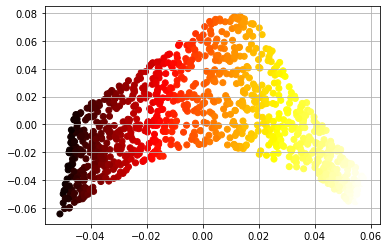

In [83]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)
plt.grid()